In [1]:
import pandas as pd
import numpy as np

import time
import itertools as it

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df_TRAIN = pd.read_csv('data/train.csv')
df_TEST = pd.read_csv('data/test.csv')
df = pd.concat((df_TRAIN, df_TEST), ignore_index=True)

# Drop Id column
df.drop("Id", axis = 1, inplace = True)

In [3]:
# Fill na according to given description.txt
df['Alley'] = df['Alley'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['PoolQC'] = df['PoolQC'].fillna('NA')
df['Fence'] = df['Fence'].fillna('NA')
df['MiscFeature'] = df['MiscFeature'].fillna('NA')
df['SaleType'] = df['SaleType'].fillna('Oth')

df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [4]:
# convert numerical features that act as categorical
df['MSSubClass'] = df['MSSubClass'].replace({20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 50: 'SC50',
                                             60: 'SC60', 70: 'SC70', 75: 'SC75', 80: 'SC80', 85: 'SC85',
                                             90: 'SC90', 120: 'SC120', 150: 'SC150', 160: 'SC160', 
                                             180: 'SC180', 190: 'SC190'})

df['MoSold'] = df['MoSold'].replace({1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN',
                                     7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC'})

In [5]:
# convert ratings to numerical
df['OverallQual'] = df['OverallQual'].replace({(1, 2, 3): 1, 
                                               (4, 5, 6): 2, 
                                               (7, 8, 9, 10): 3})

df['OverallCond'] = df['OverallCond'].replace({(1, 2, 3): 1, 
                                               (4, 5, 6): 2, 
                                               (7, 8, 9, 10): 3})

df['ExterQual'] = df['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['ExterCond'] = df['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['BsmtQual'] = df['BsmtQual'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['BsmtCond'] = df['BsmtCond'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['BsmtExposure'] = df['BsmtExposure'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['HeatingQC'] = df['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['KitchenQual'] = df['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Functional'] = df['Functional'].replace({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})
df['FireplaceQu'] = df['FireplaceQu'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['GarageQual'] = df['GarageQual'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['GarageCond'] = df['GarageCond'].replace({'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['PoolQC'] = df['PoolQC'].replace({'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['Fence'] = df['Fence'].replace({'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

In [6]:
# combine important related features
## ratings
df['ExterScore'] = df['ExterQual'] * df['ExterCond']
df['BsmtScore'] = df['TotalBsmtSF'] * df['BsmtQual'] * df['BsmtCond']
df['FireplaceScore'] = df['FireplaceQu'] * df['Fireplaces']
df['GarageScore'] = df['GarageQual'] * df['GarageCond'] * df['GarageArea'] * df['GarageCars'] 
df['PoolScore'] = df['PoolArea'] * df['PoolQC']

In [7]:
# take a look at the correlations, and then combine related features, repeat this process
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
BsmtScore         0.721159
GrLivArea         0.708624
GarageScore       0.686427
ExterQual         0.682639
OverallQual       0.662653
KitchenQual       0.659600
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
BsmtQual          0.585207
ExterScore        0.576287
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
FireplaceQu       0.520438
FireplaceScore    0.510043
YearRemodAdd      0.507101
MasVnrArea        0.472614
GarageYrBlt       0.471062
Fireplaces        0.466929
HeatingQC         0.427649
BsmtFinSF1        0.386420
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
BsmtFinType1      0.304908
HalfBath          0.284108
GarageQual        0.273839
LotArea           0.263843
GarageCond        0.263191
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BsmtCond          0.212607
LotFrontage       0.209624
BedroomAbvGr      0.168213
P

In [8]:
# ignore the low related features (below 0.3)
features = df.corr()[df.corr()['SalePrice'] > 0.3]['SalePrice'].sort_values(ascending=False).index

In [9]:
df_TRAIN = df[:df_TRAIN.shape[0]].copy()
df_TEST = df[df_TRAIN.shape[0]:].copy()

### Remaining Na values

In [10]:
# check for na
for col in df.loc[:, df.columns!='SalePrice'].columns[:]:
    # print(col, '\tTYPE: ', df[col].dtype, '\tMISSING: ', df[col].isna().sum())
    if df_TEST[col].isna().sum():
        print(f'TEST - {col}, {df[col].isna().sum()}')
        
    if df_TRAIN[col].isna().sum():
        print(f'TRAIN - {col}, {df[col].isna().sum()}')

TEST - MSZoning, 4
TEST - Utilities, 2
TEST - Exterior1st, 1
TEST - Exterior2nd, 1
TRAIN - Electrical, 1
TEST - KitchenQual, 1
TEST - Functional, 2


In [11]:
# handle remaining na in train and test
for col in df.loc[:, df.columns!='SalePrice'].columns:
    # print(col, '\tTYPE: ', df[col].dtype, '\tMISSING: ', df[col].isna().sum())
    if df_TEST[col].isna().sum():
        if df_TEST[col].dtype != 'object':
            df_TEST[col] = df_TEST[col].fillna(df_TEST[col].mean())
        else:
            df_TEST[col] = df_TEST[col].fillna(df_TEST[col].mode()[0])
        
    if df_TRAIN[col].isna().sum():
        if df_TRAIN[col].dtype != 'object':
            df_TRAIN[col] = df_TRAIN[col].fillna(df_TRAIN[col].mean())
        else:
            df_TRAIN[col] = df_TRAIN[col].fillna(df_TRAIN[col].mode()[0])

### Training set visual analysis

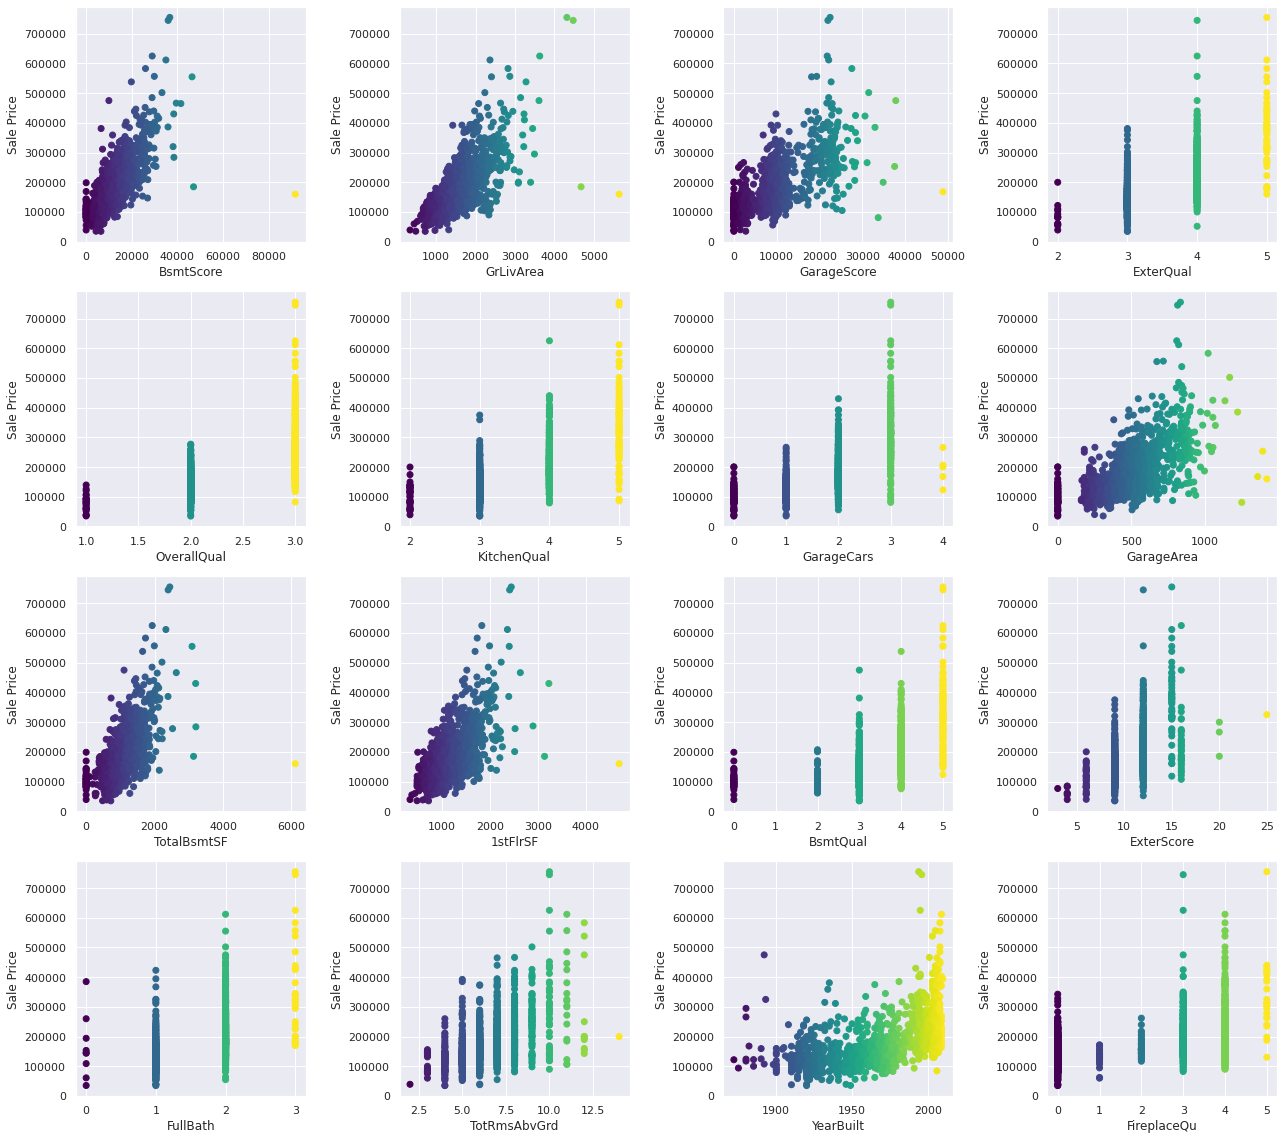

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(18, 16))

iters = [iter(features[1:17])] * 4
iter_features = list(zip(*iters))

for i in range(4):
    for j in range(4):
        ax[i][j].scatter(x=df_TRAIN[iter_features[i][j]], y=df_TRAIN['SalePrice'], label=iter_features[i][j], c=df_TRAIN[iter_features[i][j]], cmap='viridis')
        ax[i][j].set_xlabel(iter_features[i][j])
        ax[i][j].set_ylabel('Sale Price')

plt.tight_layout()

In [13]:
# drop outliers from training set
df_TRAIN.drop(df_TRAIN[df_TRAIN['BsmtScore'] > 60000].index, axis=0, inplace=True)
df_TRAIN.drop(df_TRAIN[df_TRAIN['TotalBsmtSF'] > 6000].index, axis=0, inplace=True)
df_TRAIN.drop(df_TRAIN[df_TRAIN['GrLivArea'] > 4000].index, axis=0, inplace=True)
df_TRAIN.drop(df_TRAIN[df_TRAIN['1stFlrSF'] > 4000].index, axis=0, inplace=True)
df_TRAIN.drop(df_TRAIN[df_TRAIN['MasVnrArea'] > 1250].index, axis=0, inplace=True)

In [14]:
# create new df
df = pd.concat((df_TRAIN, df_TEST))

In [15]:
# polynomials and sqr of most 10 important features
for col in df[features[1:17]].columns[:10]:
    df[col + '_**2'] = df[col] ** 2
    df[col + '_**3'] = df[col] ** 3
    df[col + '_**sqr'] = np.sqrt(df[col])

In [16]:
# apply log transform to numerical columns
df[df.select_dtypes(exclude='object').columns] = df[df.select_dtypes(exclude='object').columns].apply(np.log1p)

In [17]:
df = pd.get_dummies(df)

In [18]:
X_TRAIN = df.drop('SalePrice', axis=1).to_numpy()[:df_TRAIN.shape[0]]
y_TRAIN = df['SalePrice'].to_numpy()[:df_TRAIN.shape[0]]
X_TEST = df.drop('SalePrice', axis=1).to_numpy()[df_TRAIN.shape[0]:]
print(f'X TRAIN: {X_TRAIN.shape}, y TRAIN: {y_TRAIN.shape}')
print(f'X TEST: {X_TEST.shape}')

X TRAIN: (1454, 300), y TRAIN: (1454,)
X TEST: (1459, 300)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y_TRAIN, random_state=42, shuffle=True)
print(f'X train: {X_train.shape}, y train: {y_train.shape}')
print(f'X test: {X_test.shape}, y test: {y_test.shape}')

X train: (1090, 300), y train: (1090,)
X test: (364, 300), y test: (364,)


In [20]:
def gridsearch(model, parameters):
    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=2, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(" Results from Grid Search " )
    print("The best estimator across ALL searched params:\n",grid.best_estimator_)
    print("The best score across ALL searched params:\n",grid.best_score_)
    print("The best parameters across ALL searched params:\n\n",grid.best_params_)
    return grid.best_params_


def train(model):
    start = time.time()
    model.fit(X_train, y_train)
    print(f'Training time : {time.time() - start}')

def summary(model):
    y_train_model = model.predict(X_train)
    y_test_model = model.predict(X_test)
    
    test_rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    train_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    
    print(f'Train: {model.score(X_train, y_train)}, Test: {model.score(X_test, y_test)}')
    print(" Train R^2 : ", r2_score(y_train, y_train_model), "Test R^2 : ", r2_score(y_test, y_test_model))
    print("Train MAE :", mean_absolute_error(y_train, y_train_model), " Test MAE :", mean_absolute_error(y_test, y_test_model))
    print("Train RMSE :", np.mean(train_rmse), " Test RMSE :", np.mean(test_rmse))
    
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    marker = '1'
    markersize = 80
    
    ax[0].scatter(x=y_train_model, y=y_train, label='Training data', marker=marker, s=markersize)
    ax[0].scatter(x=y_test_model, y=y_test, label='Test data', marker=marker, s=markersize)
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    
    ax[1].scatter(x=y_train_model, y=y_train_model - y_train, label='Training data', marker=marker, s=markersize)
    ax[1].scatter(x=y_test_model, y=y_test_model - y_test, label='Test data', marker=marker, s=markersize)
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Residual')
    
    plt.legend()

 Results from Grid Search 
The best estimator across ALL searched params:
 Lasso(alpha=0.02)
The best score across ALL searched params:
 0.8175174448666443
The best parameters across ALL searched params:

 {'alpha': 0.02}
Training time : 0.01739645004272461
Train: 0.8290792340641959, Test: 0.8324504481866128
 Train R^2 :  0.8290792340641959 Test R^2 :  0.8324504481866128
Train MAE : 0.11807972974094362  Test MAE : 0.11451253582103711
Train RMSE : 0.16657048889366372  Test RMSE : 0.16175327035119447


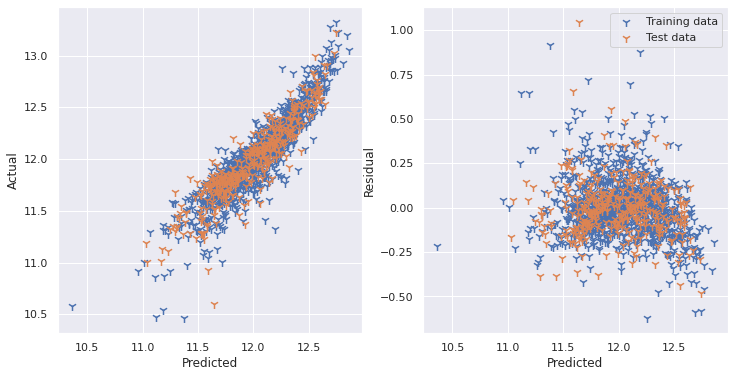

In [21]:
la = Lasso()
parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

param = gridsearch(la, parameters)
la = Lasso(**param)
train(la)
summary(la)

 Results from Grid Search 
The best estimator across ALL searched params:
 Ridge(alpha=1)
The best score across ALL searched params:
 0.8868684919893954
The best parameters across ALL searched params:

 {'alpha': 1}
Training time : 0.0058956146240234375
Train: 0.9386546336730541, Test: 0.8974897690850135
 Train R^2 :  0.9386546336730541 Test R^2 :  0.8974897690850135
Train MAE : 0.07096918238026051  Test MAE : 0.08638669784621758
Train RMSE : 0.1253362857515537  Test RMSE : 0.14127114880134553


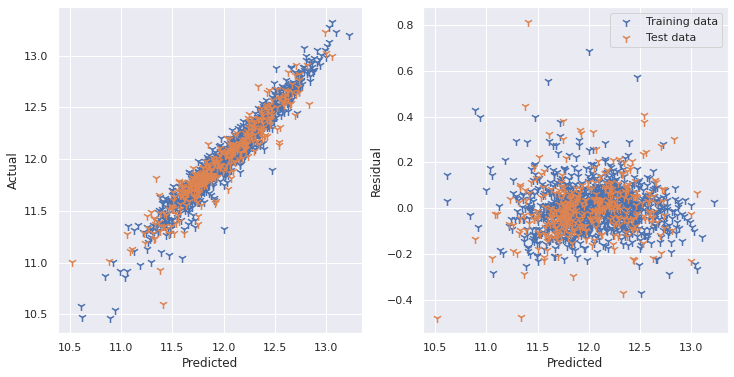

In [22]:
r = Ridge()
parameters = {'alpha': [0.0075, 0.01, 0.1, 1, 10, 100, 250]}

param = gridsearch(r, parameters)
r = Ridge(**param)
train(r)
summary(r)

 Results from Grid Search 
The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=1000,
                          subsample=0.1)
The best score across ALL searched params:
 0.897670370510586
The best parameters across ALL searched params:

 {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.1}
Training time : 2.5730364322662354
Train: 0.9727750770896377, Test: 0.912186361779059
 Train R^2 :  0.9727750770896377 Test R^2 :  0.912186361779059
Train MAE : 0.048502120142462045  Test MAE : 0.07796819919133664
Train RMSE : 0.1212396419036625  Test RMSE : 0.12535638253344664


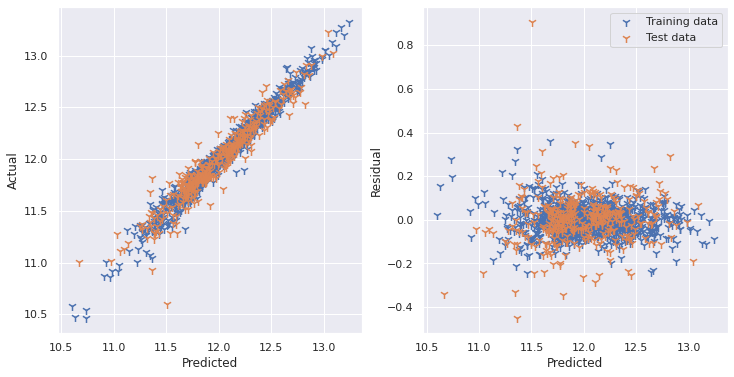

In [23]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}

param = gridsearch(gbr, parameters)
gbr = GradientBoostingRegressor(**param)
train(gbr)
summary(gbr)

In [24]:
submission_result = np.expm1(gbr.predict(X_TEST))
submission = pd.DataFrame({'Id': df_TEST.index + 1, 'SalePrice': submission_result})
submission.to_csv("submission.csv", index = False, header = True)